# 4. 신경망 학습

+ 학습 : 훈련 데이터로부터 가중치 __매개변수의 최적값__ 을 자동으로 획득하는 것.
+ 신경망 학습도 현재의 상태를 '하나의 지표'로 표현하고, 이 지표를 가장 좋게 만들어주는 _가중치 매개변수의 값_ 을 탐색합니다. 보통 이 지표가 '손실함수'이고 보통 __평균 제곱 오차, 엔트로피 오차__ 를 사용합니다.

### 4.2.1 평균 제곱 오차
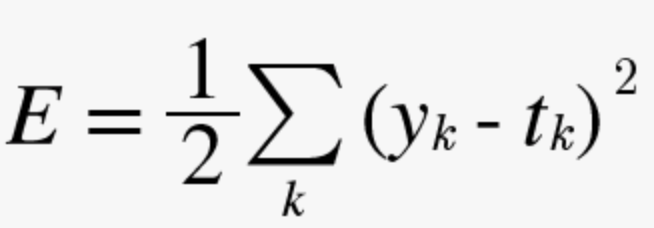
+ 여기서 신경망의 출력 y는 소프트맥스 함수의 출력입니다. t는 정답은 1로, 정답이 아닌 다른 것들은 0으로 나타내는데 이러한 표기법을 __"원-핫 인코딩"__ 이라고 합니다. 

In [5]:
import numpy as np

def MSE(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
MSE(np.array(y), np.array(t))

0.09750000000000003

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
MSE(np.array(y), np.array(t))

0.5975

평균오차제곱이 더 작은 것이 정답에 더 가깝습니다.

### 4.2.2 교차 엔트로피 오차


In [10]:
def cross_entropy_error(y, t):
    delta = 1*e - 7
    return -np.sum(t * np.log(y + delta)) # 여기서 아주 작은 수 델타를 더해주는 이유는 np.log()에 0이 입력되면 마이너스 무한대를 뜻하게 되기 떄문.

In [13]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# cross_entropy_error(np.array(t), np.array(y))

### 4.2.3 미니배치 학습

이때까지는 하나의 데이터에 대한 손실함수를 생각, 

In [15]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_text, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)
    
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [22]:
# 이 훈련데이터에서 랜덤으로 10장만 빼내야 하는데, 이때 np.random.choice() 함수를 사용해준다. 
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
# x_batch.shape
t_batch = t_train[batch_mask]
# t_batch.shape

### 4.2.4 배치용 교차엔트로피 오차 구현하기.

In [23]:
def CEE2(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

+ 만약에 정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7'등의 숫자레이블이라면?

In [28]:
def CEE3(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size) , t])) / batch_size

신경망 학습이 잘 이루어지려면, 연속적이고 미세한 값의 변화가 일어나야 하며 곡선의 기울기도 연속적으로 변해야 한다. 

### 4.3 수치미분
+ 미분은 "한순간의 변화량"을 의미한다.
+ x의 작은 변화가 함수 f(x)를 얼마나 변화시키느냐를 의미한다. 즉 시간을 뜻하는 h를 한없이 0에 가깝게 했을 때의 변화량을 말하는 것이다. 

미분을 구현해보자.

In [1]:
# 수치 미분 함수
def numerical_diff(f, x):
    h = 1*0.0001 - 4
    return (f(x + h) - f(x - h)) / (2*h)

In [2]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

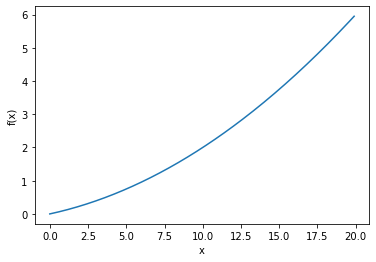

None


In [4]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
print(plt.show())

In [6]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.2
0.30000000000000004


#### 4.3.3 편미분
'특정 변수'에 대한 미분을 의미한다.

In [9]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [10]:
def function_tmp1(x0):
    return x[0]**2 + 4.0**2.0

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

8.000000000000002

In [12]:
# 모든 변수의 편미분을 벡터로 정리한 것 : 기울기.
def numerical_gradient(f, x):
    h = 1*0.0001 - 4
    grad = np.zeros_like(x)
    
    # 각 x에 대한 편미분을 구해주는 것. 
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [15]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
numerical_gradient(function_2, np.array([3.0, 0.0]))

[6. 8.]
[-0.  4.]


array([ 6., -0.])

- 기울기는 __각 지점에서 함수의 출력값을 가장 줄이는 방향__ 을 가리킨다.

#### 4.4.1 경사하강법
그 기울기의 방향으로 나아가는 일을 반복함으로써 함수의 값을 점차 줄여나가는 법을 __경사법__ 이라고 한다. 

In [20]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x) # 기울기가 0이라는 말이 즉 최솟값이라는 의미니까.
        x -= lr * grad # 여기서 grad 미분값은 학습으로 따지면 손실함수의 미분값?
    return x

In [21]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [22]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100))

[-6.11110820e-10  8.14814331e-10]


+ __하이퍼파라미터__ : 가중치와 편향같이 자동으로 획득되는 매개변수가 아닌, 사람이 직접 설정해야하는 매개변수이다. 예를 들어서 학습률이 있다. 